In [12]:
# In recent versions of Jupyter notebooks, the command %matplotlib inline is unnecessary 
# as the plots are displayed below the cell by default.
%matplotlib inline

# Display output in separate window, interactivity is possible
#%matplotlib


# matplotlib: an anthology

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib.

`pyplot` provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab(TM). Therefore, the majority of plotting commands in pyplot have Matlab(TM) analogs with similar arguments. 

resources used:

- https://matplotlib.org/stable/tutorials/introductory/quick_start.html
- https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html
- https://github.com/rougier/matplotlib-tutorial
- https://github.com/stefmolin/python-data-viz-workshop/blob/main/notebooks/1-getting_started_with_matplotlib.ipynb
- https://realpython.com/python-matplotlib-guide/


## pyplot vs. Object-Oriented interface
source: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

When using matplotlib we have two approaches:

- implicit: pyplot interface / functional interface.
- explicit: Object-Oriented interface (OO).

Check https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces

### pyplot interface
matplotlib on the surface is made to imitate MATLAB's method of generating plots, which is called pyplot. All the pyplot commands make changes and modify the same figure. This is a state-based interface, where the state (i.e., the figure) is preserved through various function calls (i.e., the methods that modify the figure). This interface allows us to quickly and easily generate plots. The state-based nature of the interface allows us to add elements and/or modify the plot as we need, when we need it.

This interface shares a lot of similarities in syntax and methodology with MATLAB.
The example below draws the graph of distance vs time

```python
# matplotlib_first_plot.py
# using pyplot functions

import matplotlib.pyplot as plt

# Data for plotting
time = [2, 4, 6, 8, 10]
distance = [1, 4, 9, 19, 39]
velocity = [1, 16, 26, 36, 111]

plt.figure(figsize=(9,7), dpi=100)

plt.plot(time,distance,'bo-', label='distance')
plt.plot(time,velocity, label='velocity')  # scaling, another y-axis???

plt.xlabel("Time")
plt.ylabel("Distance")

plt.legend()
plt.grid(True)
```

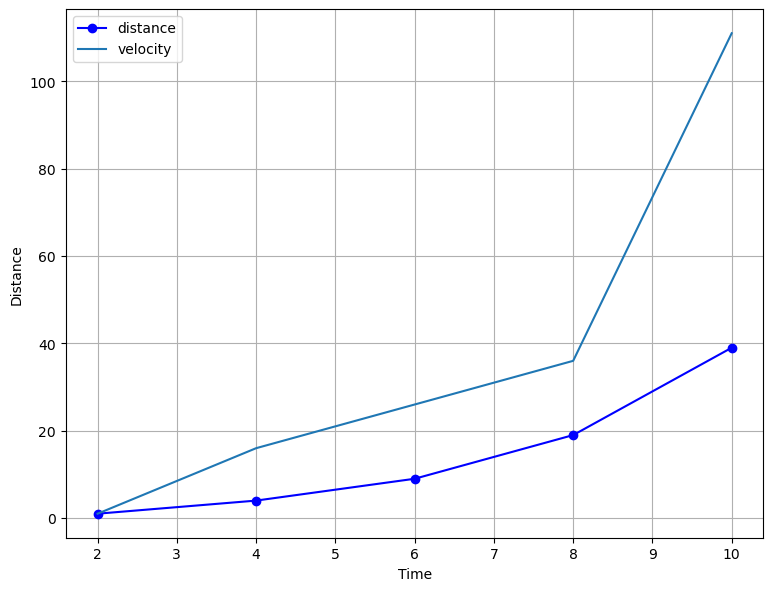

In [9]:
run matplotlib_first_plot.py

### Object-Oriented interface
When using the OO interface, it helps to know how the matplotlib structures its plots. The final plot that we see as the output is a ‘Figure’ object. The Figure object is the top level container for all the other elements that make up the graphic image. These other elements are called _Artists_. Artists are basically all the elements that are rendered onto the figure. This can include text, patches (like arrows and shapes), etc. The Figure object can be thought of as a canvas, upon which different artists act to create the final graphic image. This Figure can contain any number of various artists.

Each plot that we see in a figure, is an Axes object. The Axes object holds the actual data that we are going to display. It will also contain X- and Y-axis labels, a title. Each Axes object will contain two or more Axis objects.
The Axis objects set the data limits. It also contains the ticks and ticks labels. ticks are the marks that we see on a axis.

```python
# matplotlib_first_plot_oo.py

# using oo approach

import matplotlib.pyplot as plt

# Data for plotting
time = [2, 4, 6, 8, 10]
distance = [1, 4, 9, 19, 39]
velocity = [1, 16, 26, 36, 111]

fig, ax1 = plt.subplots()

ax1.set_ylabel("distance (m)")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis


ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time")
ax2.plot(time, velocity, "green")

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()
```

In [ ]:
run matplotlib_first_plot_oo.py

## Showcase example code: Anatomy of a figure

The code below shows the name of several matplotlib elements composing a figure

source: https://matplotlib.org/2.0.2/examples/showcase/anatomy.html

In [ ]:
# Anatomy of a figure
# This figure shows the name of several matplotlib elements composing a figure
# https://matplotlib.org/2.0.2/examples/showcase/anatomy.html


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

## matplotlib Object Hierarchy: more
source: 
- https://realpython.com/python-matplotlib-guide/
- https://www.janmeppe.com/blog/Plotting-with-Matplotlib/

One important big-picture matplotlib concept is its _object hierarchy_: there is a tree-like structure of matplotlib objects underlying each plot. Basically, the hierarchy is as follows: Figure, Axes, Axis and all other stuff that goes on a plot. 

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

- A Figure object can have multiple Axes objects. This thing right here is what makes the terminology so confusing, think of the Axes object simply as an individual plot or graph.
- An Axes object has two Axis objects (x-axis and y-axis)
- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. 
Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels.

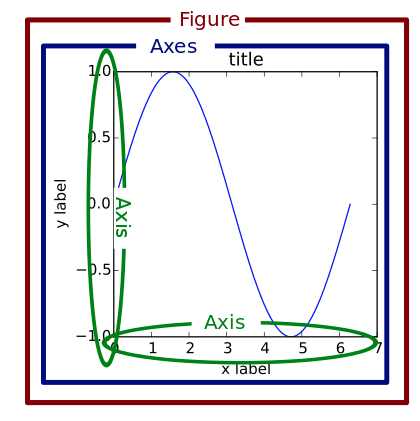
Chart: object hierarchy (source: https://www.janmeppe.com/blog/Plotting-with-Matplotlib/)

You can only manipulate one Axes object at a time. With pyplot, simple functions are used to add plot elements (lines, images, text, etc.) to the current Axes in the current figure.” 

Functions like gca() refer to getCurrentAxes() which basically grabs the current Axes so you can work on it.

# Getting started

imports are necessary to use matplotlib. Use some standard shorthands for Matplotlib imports

```python

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

```

In [3]:
# use some standard shorthands for Matplotlib imports

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# A step by step example

source: https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

matplotlib graphs your data on a `figure` each of which can contain one or more `Axes`, an
area where points can be specified in terms of coordinates 

The simplest way of creating a Figure with an Axes is using `pyplot.subplots`.

Note: With subplot you can arrange plots in a regular grid. You need to specify the number of rows and columns and the number of the plot. Note that the `gridspec` command is a more powerful alternative.



## Parts of a Figure

Here are the components of a matplotlib figure.

### `figure`

The **whole** figure.  The figure keeps
track of all the child `Axes`, a group of
'special' Artists (titles, figure legends, colorbars, etc), and
even nested subfigures.

The easiest way to create a new Figure is with pyplot::

```python
   fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

It is often convenient to create the Axes together with the Figure, but you
can also manually add Axes later on.  

In [4]:
fig = plt.figure() # an empty figure with no Axes

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

print(type(fig))
print(type(ax))
print(dir(ax))

In [ ]:
# 2 axes columnwise
fig1, axs = plt.subplots(2,1)

print(type(axs))
print(type(axs[1]))


fig2, (ax1, ax2) = plt.subplots(2,1)

print(type(ax1))

In [ ]:
#2 axes rowwise
fig, (ax1, ax2) = plt.subplots(1,2)


### `Axes`

An Axes is an Artist attached to a Figure that contains a region for
plotting data, and usually includes two (or three in the case of 3D)
`Axis` objects (be aware of the difference
between **Axes** and **Axis**) that provide ticks and tick labels to
provide scales for the data in the Axes. Each `Axes` also
has a title
(set via `set_title`), an x-label (set via
`set_xlabel`), and a y-label set via
`set_ylabel`).

The `Axes` class and its member functions are the primary
entry point to working with the OOP interface, and have most of the
plotting methods defined on them 

<class 'list'>


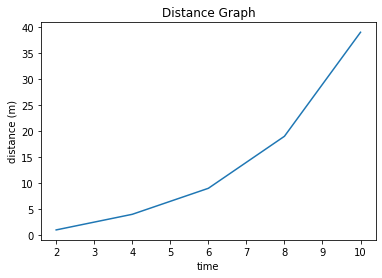

In [8]:
time = [2, 4, 6, 8, 10]
distance = [1, 4, 9, 19, 39]

print(type(time))

fig, ax = plt.subplots()
ax.plot(time, distance)
ax.set(xlabel='time',
       ylabel='distance (m)',
       title='Distance Graph')

plt.show()


### `Axis`

These objects set the scale and limits and generate ticks (the marks
on the Axis) and ticklabels (strings labeling the ticks).  The location
of the ticks is determined by a `Locator` object and the
ticklabel strings are formatted by a `Formatter`.  The
combination of the correct `Locator` and `Formatter` gives very fine
control over the tick locations and labels.

### `Artist`

Basically, everything visible on the Figure is an Artist. When the Figure is rendered, all of the
Artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.

## Input to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as
input, or objects that can be passed to `numpy.asarray`(e.g. a Python list, pandas DataFrame). 
Classes that are similar to arrays ('array-like') such as `pandas`
data objects and `numpy.matrix` may not work as intended.  Common convention
is to convert these to `numpy.array` objects prior to plotting.


use `Axes.plot` to draw some data on the Axes:


In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([2, 4, 6, 8, 10], [1, 4, 9, 19, 39]);  # Plot some data on the axes.

In [ ]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

# Styling Artists

Most plotting methods have styling options for the Artists, accessible either
when a plotting method is called, or from a "setter" on the Artist.  

In the
plot below the *color*, *linewidth*, and *linestyle* of the
Artists created by `plot` are set, and we set the linestyle of the second line
after the fact with `set_linestyle`.



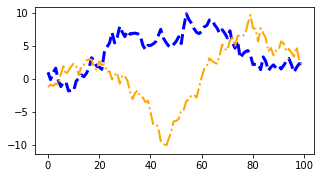

In [15]:
data1, data2 = np.random.randn(2, 100)  # make 2 random data sets

fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle('dashdot');

### Colors

Check: https://matplotlib.org/stable/tutorials/colors/colors.html

Matplotlib has a very flexible array of colors that are accepted for most
Artists.

A single character shorthand notation for some basic colors (similar to Matlab)

- 'b' as blue
- 'g' as green
- 'r' as red
- 'c' as cyan
- 'm' as magenta
- 'y' as yellow
- 'k' as black
- 'w' as white


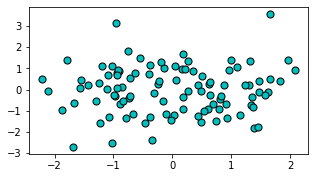

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='c', edgecolor='k');

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and
available for Artists that have stroked lines.  

- 'solid' or '-'
- 'dotted' or ':'
- 'dashed' or '--'
- 'dashdot'or  '-.'

All possible markers: check https://matplotlib.org/stable/api/markers_api.html

Marker size depends on the method being used.  `~.Axes.plot` specifies
markersize in points, and is generally the "diameter" or width of the
marker.  


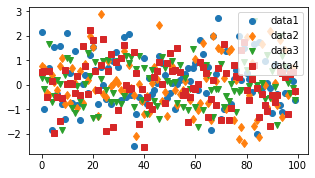

In [17]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## Labelling plots

### Axes labels and text

`set_xlabel`, `set_ylabel`, and `set_title` are used to
add text in the indicated locations.  Text can also be directly added to plots using
`text`:


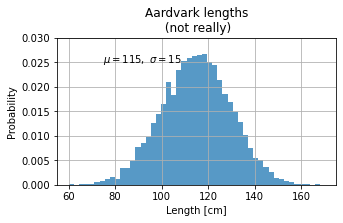

In [19]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs:

    ax.set_title(r'$\sigma_i=15$')

where the ``r`` preceding the title string signifies that the string is a
*raw* string and not to treat backslashes as python escapes.
Matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts.

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing
to *xy*, to a piece of text at *xytext*:

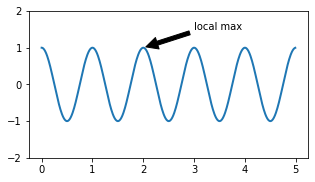

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

In this basic example, both *xy* and *xytext* are in data coordinates.

### Legends

Often we want to identify lines or markers with a `legend`:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent. 

Check: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html

## Axis scales and ticks

Each Axes has two (or three) `Axis` objects representing the x- and
y-axis. These control the *scale* of the Axis, the tick *locators* and the
tick *formatters*. Additional Axes can be attached to display further Axis
objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales,
such as a log-scale.  Since log-scales are used so much there are also
direct methods like `loglog`, `semilogx`, and
`semilogy`.  

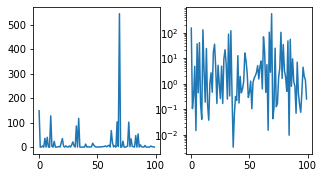

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

### Tick locators and formatters

Each Axis has a tick *locator* and *formatter* that choose where along the
Axis objects to put tick marks.  A simple interface to this is
`set_xticks`:

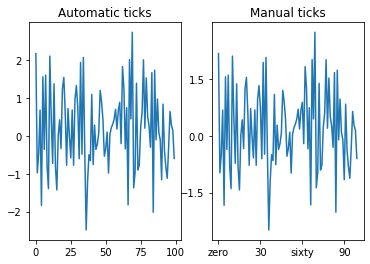

In [27]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30))
axs[1].set_xticklabels(['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as
well as floating point numbers.  These get special locators and formatters
as appropriate.  For dates:

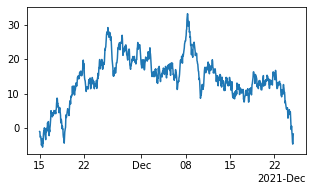

In [24]:
fig, ax = plt.subplots(figsize=(5, 2.7))
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

### Additional Axis objects

Plotting data of different magnitude in one chart may require
an additional y-axis. Such an Axis can be created by using
`twinx` to add a new Axes with an invisible x-axis and a y-axis
positioned at the right (analogously for `twiny`). 

Similarly, you can add a `secondary_xaxis` or
`secondary_yaxis` having a different scale than the main Axis to
represent the data in different scales or units. 

Text(0.5, 0, 'Angle [°]')

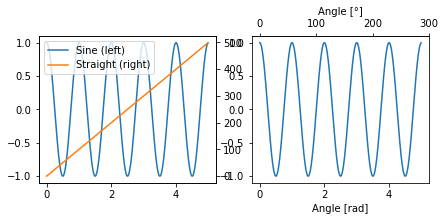

In [29]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7))
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')